# Scatter plot , lmplot


상관관계 및 이상치를 확인하기 좋은 표현 방법.

In [2]:
import seaborn as sns
import pandas as pd
sns.set()

In [3]:
# Load the example planets dataset
planets = sns.load_dataset("planets")
planets.shape

(1035, 6)

In [4]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [5]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [6]:
planets['method'].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

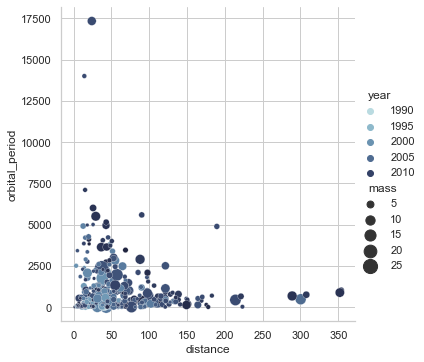

In [7]:
sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=planets,
    x="distance", y="orbital_period",
    hue="year", size="mass",
    palette=cmap, sizes=(10, 200),
)

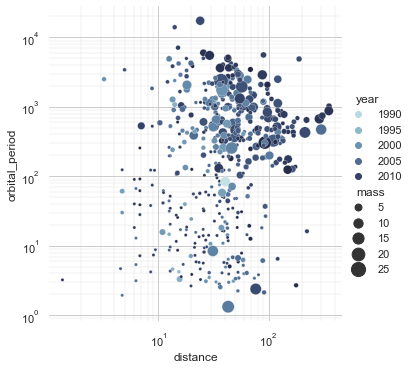

In [8]:
sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=planets,
    x="distance", y="orbital_period",
    hue="year", size="mass",
    palette=cmap, sizes=(10, 200),
)

g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

이상치가 많이 크다.

In [12]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [27]:
zoom = planets[0<(planets['distance']<10e1) &(planets['orbital_period'] <10e1)]

zoom.head()

,method,number,orbital_period,mass,distance,year
16,Radial Velocity,1,4.230785,0.472,15.36,1995
17,Radial Velocity,5,14.651000,0.800,12.53,1996
18,Radial Velocity,5,44.380000,0.165,12.53,2004
20,Radial Velocity,5,0.736540,NaN,12.53,2011
22,Radial Velocity,3,4.215000,0.016,8.52,2009


특정 값을 확대해보기 위해 data 값을 바꿔서 넣어봄.

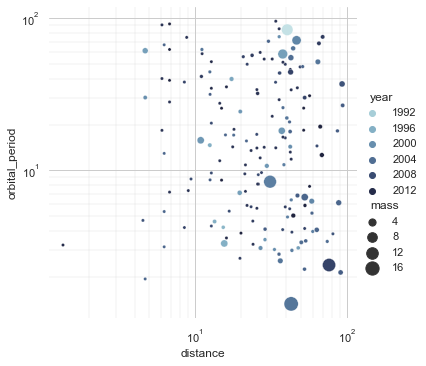

In [28]:
sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=zoom,
    x="distance", y="orbital_period",
    hue="year", size="mass",
    palette=cmap, sizes=(10, 200),
)

g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

# lmplot

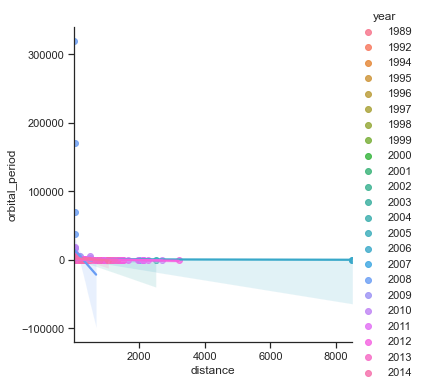

In [36]:
# import seaborn as sns


sns.set_theme(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset


sns.lmplot(
data=planets,
    x="distance", y="orbital_period",
    hue="year")



# sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=zoom,
#            col_wrap=2, ci=None, palette="muted", height=4,
#            scatter_kws={"s": 50, "alpha": 1})

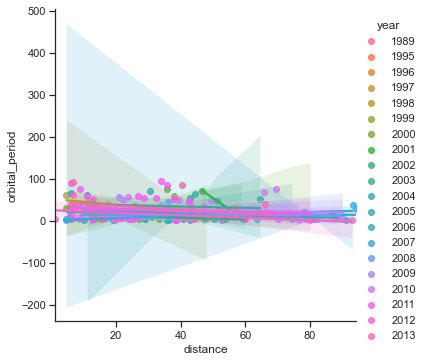

In [37]:
# import seaborn as sns


sns.set_theme(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset


sns.lmplot(
data=zoom,
    x="distance", y="orbital_period",
    hue="year")

그래프 상 상관관계를 보이지 않고있다.

In [38]:
planets[['distance','orbital_period']].corr()

,distance,orbital_period
distance,1.000000,-0.034365
orbital_period,-0.034365,1.000000


거의 무시될 정도의 상관관계이다.

----------